In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from pathlib import Path

if "workding_dir" not in locals():
    workding_dir = str(Path.cwd().parent)
os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/papers/rapget-translation


In [3]:
from dotenv import find_dotenv, load_dotenv
from llm_toolkit.llm_utils import *
from llm_toolkit.translation_utils_v2 import *
from eval_modules.calc_repetitions_v2e import *

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=False)

force_recalculate = os.getenv("FORCE_RECALCULATE", "False").lower() == "true"
print(f"force_recalculate: {force_recalculate}")

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/inflaton/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


loading: /Users/inflaton/code/engd/papers/rapget-translation/eval_modules/calc_repetitions_v2e.py
loading /Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils_v2.py


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/inflaton/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Lightning automatically upgraded your loaded checkpoint from v1.8.3.post1 to v2.4.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../../../../.cache/huggingface/hub/models--Unbabel--wmt22-comet-da/snapshots/371e9839ca4e213dde891b066cf3080f75ec7e72/checkpoints/model.ckpt`
Encoder model frozen.


loading env vars from: /Users/inflaton/code/engd/papers/rapget-translation/.env
force_recalculate: False


/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/core/saving.py:195: Found keys that are not in the model state dict but in the checkpoint: ['encoder.model.embeddings.position_ids']


## Performance Scores

In [4]:
import pandas as pd

df_gp = pd.read_csv("results/mac-results_rpp_with_mnt_2048_generic_prompt_metrics.csv")
df_gp

model   rpp     comet    meteor  \
0                internlm/internlm2_5-7b-chat  1.00  0.735800  0.429761   
1                internlm/internlm2_5-7b-chat  1.02  0.737719  0.424668   
2                internlm/internlm2_5-7b-chat  1.04  0.737116  0.417335   
3                internlm/internlm2_5-7b-chat  1.06  0.733860  0.399761   
4                internlm/internlm2_5-7b-chat  1.08  0.731823  0.388161   
5                internlm/internlm2_5-7b-chat  1.10  0.728865  0.378418   
6             microsoft/Phi-3.5-mini-instruct  1.00  0.710605  0.378893   
7             microsoft/Phi-3.5-mini-instruct  1.02  0.715098  0.374105   
8             microsoft/Phi-3.5-mini-instruct  1.04  0.707464  0.353870   
9             microsoft/Phi-3.5-mini-instruct  1.06  0.696230  0.325285   
10            microsoft/Phi-3.5-mini-instruct  1.08  0.682341  0.301599   
11            microsoft/Phi-3.5-mini-instruct  1.10  0.671785  0.288573   
12     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.00  0.739080  0.449010   
13     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.02  0.743019  0.451491   
14     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.04  0.743220  0.451750   
15     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.06  0.743082  0.448415   
16     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.08  0.743594  0.440773   
17     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.10  0.742706  0.435894   
18      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.00  0.388860  0.205588   
19      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.02  0.401959  0.202099   
20  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.00  0.722226  0.403990   
21  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.02  0.723644  0.405110   
22  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.04  0.723881  0.403946   
23  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.06  0.725263  0.401280   
24  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.08  0.726117  0.398740   
25  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.10  0.726463  0.396486   

       spbleu    bleu_1   rouge_l   ews_score  repetition_score  \
0   15.060227  0.150602  0.409758    0.049426          9.235658   
1   14.728605  0.147286  0.406325    0.069726          5.356575   
2   13.846404  0.138464  0.398812    0.068844          5.315093   
3   12.213375  0.122134  0.384137    0.058252          5.275375   
4   11.369736  0.113697  0.372963    0.067079          5.283319   
5   10.377989  0.103780  0.361842    0.052074          5.288614   
6    9.700329  0.097003  0.355613    5.390997         12.997352   
7    9.910634  0.099106  0.345316    3.586055          7.001765   
8    9.197213  0.091972  0.322582    0.051192          0.055605   
9    6.967166  0.069672  0.294876    0.035305          0.067961   
10   5.452744  0.054527  0.272639    0.076787          0.047661   
11   4.751039  0.047510  0.260428    0.080318          0.023831   
12   6.701340  0.067013  0.419618    0.367167        139.809356   
13   8.545955  0.085460  0.421494    1.003530         67.003530   
14  10.080425  0.100804  0.420097    0.010591         35.197705   
15  10.374705  0.103747  0.416029    1.800530         26.880847   
16  10.930453  0.109305  0.411306    0.092674         12.007944   
17  11.381344  0.113813  0.406298    0.039718          0.668138   
18   0.243459  0.002435  0.184455  638.279788       3889.923213   
19   0.247370  0.002474  0.179554  611.315975       3759.759929   
20  13.461180  0.134612  0.381996    0.057370          5.873786   
21  13.185379  0.131854  0.382462    0.062665          5.840247   
22  13.314773  0.133148  0.381374    0.057370          5.845543   
23  13.199243  0.131992  0.379829    0.062665          5.847308   
24  12.656486  0.126565  0.376975    0.056487          5.820830   
25  12.284962  0.122850  0.374456    0.049426          0.092674   

    total_repetitions        rr       rap  translation_completeness  \
0            9.285084  0.075250  0.581878                  1.000000   
1            5.426302  0.046255  0.640010                  1.0

In [5]:
df_ct = pd.read_csv("results/mac-results_rpp_with_mnt_2048_metrics.csv")
df_ct

model   rpp     comet    meteor  \
0                internlm/internlm2_5-7b-chat  1.00  0.739700  0.429000   
1                internlm/internlm2_5-7b-chat  1.02  0.740224  0.426625   
2                internlm/internlm2_5-7b-chat  1.04  0.739886  0.415459   
3                internlm/internlm2_5-7b-chat  1.06  0.737936  0.403959   
4                internlm/internlm2_5-7b-chat  1.08  0.731999  0.387318   
5                internlm/internlm2_5-7b-chat  1.10  0.729535  0.376931   
6             microsoft/Phi-3.5-mini-instruct  1.00  0.710784  0.379683   
7             microsoft/Phi-3.5-mini-instruct  1.02  0.716477  0.378059   
8             microsoft/Phi-3.5-mini-instruct  1.04  0.711123  0.354716   
9             microsoft/Phi-3.5-mini-instruct  1.06  0.702436  0.329873   
10            microsoft/Phi-3.5-mini-instruct  1.08  0.688211  0.305454   
11            microsoft/Phi-3.5-mini-instruct  1.10  0.671299  0.290383   
12     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.00  0.750182  0.461111   
13     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.02  0.748511  0.457152   
14     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.04  0.750059  0.456047   
15     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.06  0.748813  0.452042   
16     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.08  0.747385  0.444211   
17     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.10  0.746571  0.437984   
18      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.00  0.742640  0.433633   
19      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.02  0.743648  0.432905   
20      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.04  0.744094  0.432048   
21      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.06  0.742650  0.427543   
22      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.08  0.740810  0.420663   
23      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.10  0.739269  0.411121   
24  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.00  0.724024  0.406834   
25  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.02  0.726310  0.406491   
26  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.04  0.727613  0.405486   
27  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.06  0.727687  0.401473   
28  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.08  0.726393  0.398702   
29  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.10  0.724401  0.393224   

       spbleu    bleu_1   rouge_l  ews_score  repetition_score  \
0   14.734882  0.147349  0.409647   0.053839         12.606355   
1   14.583817  0.145838  0.407173   0.062665          9.849073   
2   13.534659  0.135347  0.396866   0.072374          6.529568   
3   12.346741  0.123467  0.387245   0.067961          6.533981   
4   11.075675  0.110757  0.372435   0.052074          9.834951   
5   10.305164  0.103052  0.363450   0.078553          6.527802   
6    8.712969  0.087130  0.358987  10.670786         17.938217   
7   10.291240  0.102912  0.354695   3.585172          7.140335   
8    8.966882  0.089669  0.330098   3.612533          0.073257   
9    7.076233  0.070762  0.301951   0.045896          0.052074   
10   5.105511  0.051055  0.273603   3.360989          0.064431   
11   4.091959  0.040920  0.251653   0.322154          0.065313   
12  17.879150  0.178791  0.434066   0.007061          0.126214   
13  17.436885  0.174369  0.431139   0.007061          0.115622   
14  17.440173  0.174402  0.430284   0.007061          0.130627   
15  16.895233  0.168952  0.426003   0.007061          0.099735   
16  16.166238  0.161662  0.419513   0.010591          0.130627   
17  15.601723  0.156017  0.413256   0.010591          0.078553   
18  15.209541  0.152095  0.408921   0.003530          3.901147   
19  15.191022  0.151910  0.406897   0.000000          3.890556   
20  15.051352  0.150514  0.406201   0.003530          0.152692   
21  14.449131  0.144491  0.400141   0.007061          0.137688   
22  13.933704  0.139337  0.396482   0.003530          0.129744   
23  13.303738  0.133037  0.387096   0.003530          0.121801   
24  13.565137  0.135651  0.386640   0.052957          0.120918  

In [6]:
mappings = {
    "total_repetitions": "MTR",
    "rpp": "Repetition Penalty Parameter",
    "ews_score": "Mean NWC Repetitions",
    "repetition_score": "Mean Text Repetitions",
    "answer_len": "Mean Answer Length",
    "nrr": "NRR",  # "Non-Repetitive Ratio",
    "rr": "RR",  # "Repetitive Ratio",
}


def find_display_name(column, rap_only=True):
    for k, v in mappings.items():
        if k in column:
            return v
    ret = "COMET"
    return (
        ret
        if "perf" in column
        else f"RAP-{ret}" if rap_only else f"{ret} and RAP-{ret}"
    )

In [7]:
def shorter(model_name):
    return (
        model_name.split("/")[-1]
        .replace("-Chinese-Chat", "")
        .replace("-instruct", "")
        .replace("-chat", "")
        .replace("-v0.3", "")
        .replace("intern", "Intern")
        .replace("b", "B")
    )

In [8]:
results = {"Generic Prompt": df_gp, "Chat Template": df_ct}

In [9]:
for df in results.values():
    df["model"] = df["model"].apply(lambda x: shorter(x))

In [10]:
results["Generic Prompt"]

model   rpp     comet    meteor     spbleu    bleu_1   rouge_l  \
0   Internlm2_5-7B  1.00  0.735800  0.429761  15.060227  0.150602  0.409758   
1   Internlm2_5-7B  1.02  0.737719  0.424668  14.728605  0.147286  0.406325   
2   Internlm2_5-7B  1.04  0.737116  0.417335  13.846404  0.138464  0.398812   
3   Internlm2_5-7B  1.06  0.733860  0.399761  12.213375  0.122134  0.384137   
4   Internlm2_5-7B  1.08  0.731823  0.388161  11.369736  0.113697  0.372963   
5   Internlm2_5-7B  1.10  0.728865  0.378418  10.377989  0.103780  0.361842   
6     Phi-3.5-mini  1.00  0.710605  0.378893   9.700329  0.097003  0.355613   
7     Phi-3.5-mini  1.02  0.715098  0.374105   9.910634  0.099106  0.345316   
8     Phi-3.5-mini  1.04  0.707464  0.353870   9.197213  0.091972  0.322582   
9     Phi-3.5-mini  1.06  0.696230  0.325285   6.967166  0.069672  0.294876   
10    Phi-3.5-mini  1.08  0.682341  0.301599   5.452744  0.054527  0.272639   
11    Phi-3.5-mini  1.10  0.671785  0.288573   4.751039  0.047510  0.260428   
12    Llama3.1-70B  1.00  0.739080  0.449010   6.701340  0.067013  0.419618   
13    Llama3.1-70B  1.02  0.743019  0.451491   8.545955  0.085460  0.421494   
14    Llama3.1-70B  1.04  0.743220  0.451750  10.080425  0.100804  0.420097   
15    Llama3.1-70B  1.06  0.743082  0.448415  10.374705  0.103747  0.416029   
16    Llama3.1-70B  1.08  0.743594  0.440773  10.930453  0.109305  0.411306   
17    Llama3.1-70B  1.10  0.742706  0.435894  11.381344  0.113813  0.406298   
18     Llama3.1-8B  1.00  0.388860  0.205588   0.243459  0.002435  0.184455   
19     Llama3.1-8B  1.02  0.401959  0.202099   0.247370  0.002474  0.179554   
20      Mistral-7B  1.00  0.722226  0.403990  13.461180  0.134612  0.381996   
21      Mistral-7B  1.02  0.723644  0.405110  13.185379  0.131854  0.382462   
22      Mistral-7B  1.04  0.723881  0.403946  13.314773  0.133148  0.381374   
23      Mistral-7B  1.06  0.725263  0.401280  13.199243  0.131992  0.379829   
24      Mistral-7B  1.08  0.726117  0.398740  12.656486  0.126565  0.376975   
25      Mistral-7B  1.10  0.726463  0.396486  12.284962  0.122850  0.374456   

     ews_score  repetition_score  total_repetitions        rr       rap  \
0     0.049426          9.235658           9.285084  0.075250  0.581878   
1     0.069726          5.356575           5.426302  0.046255  0.640010   
2     0.068844          5.315093           5.383936  0.045019  0.641978   
3     0.058252          5.275375           5.333628  0.043831  0.641530   
4     0.067079          5.283319           5.350397  0.043007  0.641406   
5     0.052074          5.288614           5.340688  0.042176  0.640478   
6     5.390997         12.997352          18.388350  0.137709  0.455607   
7     3.586055          7.001765          10.587820  0.081805  0.553567   
8     0.051192          0.055605           0.106796  0.000859  0.705642   
9     0.035305          0.067961           0.103266  0.000787  0.694589   
10    0.076787          0.047661           0.124448  0.000902  0.680497   
11    0.080318          0.023831           0.104148  0.000719  0.670338   
12    0.367167        139.809356         140.176523  0.483622  0.101764   
13    1.003530         67.003530          68.007061  0.292964  0.262617   
14    0.010591         35.197705          35.208297  0.175643  0.416354   
15    1.800530         26.880847          28.681377  0.152297  0.452656   
16    0.092674         12.007944          12.100618  0.067215  0.603505   
17    0.039718          0.668138           0.707855  0.003962  0.733913   
18  638.279788       3889.923213        4528.203001  0.921026  0.000192   
19  611.315975       3759.759929        4371.075905  0.888337  0.000560   
20    0.057370          5.873786           5.931156  0.051504  0.616283   
21    0.062665          5.840247           5.902913  0.051487  0.617524   
22    0.057370          5.845543           5.902913  0.051274  0.618144   
23    0.062665          5.847308           5.909974  0.050814  0.620225   
24  

In [11]:
results["Chat Template"]

model   rpp     comet    meteor     spbleu    bleu_1   rouge_l  \
0   Internlm2_5-7B  1.00  0.739700  0.429000  14.734882  0.147349  0.409647   
1   Internlm2_5-7B  1.02  0.740224  0.426625  14.583817  0.145838  0.407173   
2   Internlm2_5-7B  1.04  0.739886  0.415459  13.534659  0.135347  0.396866   
3   Internlm2_5-7B  1.06  0.737936  0.403959  12.346741  0.123467  0.387245   
4   Internlm2_5-7B  1.08  0.731999  0.387318  11.075675  0.110757  0.372435   
5   Internlm2_5-7B  1.10  0.729535  0.376931  10.305164  0.103052  0.363450   
6     Phi-3.5-mini  1.00  0.710784  0.379683   8.712969  0.087130  0.358987   
7     Phi-3.5-mini  1.02  0.716477  0.378059  10.291240  0.102912  0.354695   
8     Phi-3.5-mini  1.04  0.711123  0.354716   8.966882  0.089669  0.330098   
9     Phi-3.5-mini  1.06  0.702436  0.329873   7.076233  0.070762  0.301951   
10    Phi-3.5-mini  1.08  0.688211  0.305454   5.105511  0.051055  0.273603   
11    Phi-3.5-mini  1.10  0.671299  0.290383   4.091959  0.040920  0.251653   
12    Llama3.1-70B  1.00  0.750182  0.461111  17.879150  0.178791  0.434066   
13    Llama3.1-70B  1.02  0.748511  0.457152  17.436885  0.174369  0.431139   
14    Llama3.1-70B  1.04  0.750059  0.456047  17.440173  0.174402  0.430284   
15    Llama3.1-70B  1.06  0.748813  0.452042  16.895233  0.168952  0.426003   
16    Llama3.1-70B  1.08  0.747385  0.444211  16.166238  0.161662  0.419513   
17    Llama3.1-70B  1.10  0.746571  0.437984  15.601723  0.156017  0.413256   
18     Llama3.1-8B  1.00  0.742640  0.433633  15.209541  0.152095  0.408921   
19     Llama3.1-8B  1.02  0.743648  0.432905  15.191022  0.151910  0.406897   
20     Llama3.1-8B  1.04  0.744094  0.432048  15.051352  0.150514  0.406201   
21     Llama3.1-8B  1.06  0.742650  0.427543  14.449131  0.144491  0.400141   
22     Llama3.1-8B  1.08  0.740810  0.420663  13.933704  0.139337  0.396482   
23     Llama3.1-8B  1.10  0.739269  0.411121  13.303738  0.133037  0.387096   
24      Mistral-7B  1.00  0.724024  0.406834  13.565137  0.135651  0.386640   
25      Mistral-7B  1.02  0.726310  0.406491  13.429876  0.134299  0.386370   
26      Mistral-7B  1.04  0.727613  0.405486  13.295092  0.132951  0.385120   
27      Mistral-7B  1.06  0.727687  0.401473  13.108608  0.131086  0.380495   
28      Mistral-7B  1.08  0.726393  0.398702  12.850538  0.128505  0.378895   
29      Mistral-7B  1.10  0.724401  0.393224  12.361162  0.123612  0.373341   

    ews_score  repetition_score  total_repetitions        rr       rap  \
0    0.053839         12.606355          12.660194  0.103717  0.532588   
1    0.062665          9.849073           9.911739  0.083223  0.570366   
2    0.072374          6.529568           6.601942  0.056135  0.622149   
3    0.067961          6.533981           6.601942  0.055140  0.622474   
4    0.052074          9.834951           9.887026  0.079067  0.571734   
5    0.078553          6.527802           6.606355  0.053005  0.619569   
6   10.670786         17.938217          28.609003  0.202255  0.360853   
7    3.585172          7.140335          10.725508  0.085301  0.548324   
8    3.612533          0.073257           3.685790  0.029734  0.649557   
9    0.045896          0.052074           0.097970  0.000757  0.700842   
10   3.360989          0.064431           3.425419  0.023581  0.640663   
11   0.322154          0.065313           0.387467  0.002341  0.666596   
12   0.007061          0.126214           0.133274  0.001127  0.747649   
13   0.007061          0.115622           0.122683  0.001038  0.746182   
14   0.007061          0.130627           0.137688  0.001159  0.747453   
15   0.007061          0.099735           0.106796  0.000890  0.746815   
16   0.010591          0.130627           0.141218  0.001177  0.744750   
17   0.010591          0.078553           0.089144  0.000734  0.744927   
18   0.003530          3.901147           3.904678  0.032371  0.672830   
19   0.000000          3.890556           3.890556  0.032197  0.674107   
20   0.00

In [12]:
df_ct["model"].unique()

array(['Internlm2_5-7B', 'Phi-3.5-mini', 'Llama3.1-70B', 'Llama3.1-8B',
       'Mistral-7B'], dtype=object)

In [13]:
model_names = ["Phi-3.5-mini", "Mistral-7B", "Llama3.1-8B", "Llama3.1-70B"] #" internlm2_5-7B", 
model_name_exts = [
    "Generic Prompt",
    "Chat Template",
]

In [14]:
# plot the results
import matplotlib.pyplot as plt
import seaborn as sns


def plot_detailed_repetitions(results, model_names, title=True):
    # make the font size bigger
    sns.set_context("poster")

    markers = ["D", "o", "s", "x", "P", "v", "X", "p", "*", "h"]
    colors = [
        "blue",
        "orange",
        "green",
        "red",
        "purple",
        "brown",
        "pink",
        "gray",
        "olive",
        "cyan",
    ]
    bar_colors = ["blue", "orange"]

    fig, ax = plt.subplots(len(model_names), 2, figsize=(5 * len(model_names), 4 * len(model_names)))
    columns = [
        "ews_score",
        "repetition_score",
    ]

    for row, model_name in enumerate(model_names):
        print(f"Model: {model_name}")
        for col, model_name_ext in enumerate(model_name_exts):
            print(f"model_name_ext: {model_name_ext}")
            df = results[model_name_ext]
            df = df[df["model"] == model_name]

            current_ax = ax[row][col]

            bottom = 0
            for i, column in enumerate(columns):
                bar1 = sns.barplot(
                    x="rpp",
                    y=column,
                    data=df,
                    color=colors[i],
                    ax=current_ax,
                    bottom=bottom,
                    label=find_display_name(column),
                    legend=False,
                )
                bottom += df[column]

            # add values on top of the bars
            for i, p in enumerate(current_ax.patches):
                if i < len(df):
                    continue
                val = p.get_height() + current_ax.patches[i - len(df)].get_height()
                current_ax.annotate(
                    f"{val:.1f}",
                    (p.get_x() + p.get_width() / 2, val),
                    ha="center",
                    va="center",
                    xytext=(0, 10),
                    textcoords="offset points",
                )

            # increase y-axis limits
            y_max = current_ax.get_ylim()[1]
            current_ax.set_ylim([0, y_max * 1.11])

            xticklabels = [
                f"{1 + label * 0.02:.2f}" for label in current_ax.get_xticks()
            ]
            current_ax.set_xticklabels(xticklabels, rotation=0)

            xlabel = "Repetition Penalty Parameter" if row == 3 else None
            ax[row][col].set_xlabel(xlabel)

            # ylabel = "Mean Repetition Metrics" if col == 0 else None
            # ax[row][col].set_ylabel(ylabel)
            ax[row][col].set_ylabel(None)

            ax[row][col].set_title(
                f"({chr(97 + row * 2 + col)}) {model_name} - {model_name_ext}"
            )

    if title:
        fig.suptitle(f"Chinese-English Machine Translation - Repetition Metrics for Different Models")

    handles, labels = ax[0][col].get_legend_handles_labels()
    fig.legend(
        handles,
        labels,
        bbox_to_anchor=(0.5, -0.05),
        loc="lower center",
    )

    # make the plot look nice
    plt.tight_layout()
    plt.show()

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_55118/954047321.py:75: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  current_ax.set_xticklabels(x

Model: Phi-3.5-mini
model_name_ext: Generic Prompt
model_name_ext: Chat Template
Model: Mistral-7B
model_name_ext: Generic Prompt
model_name_ext: Chat Template
Model: Llama3.1-8B
model_name_ext: Generic Prompt
model_name_ext: Chat Template
Model: Llama3.1-70B
model_name_ext: Generic Prompt
model_name_ext: Chat Template


/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_55118/954047321.py:75: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  current_ax.set_xticklabels(xticklabels, rotation=0)


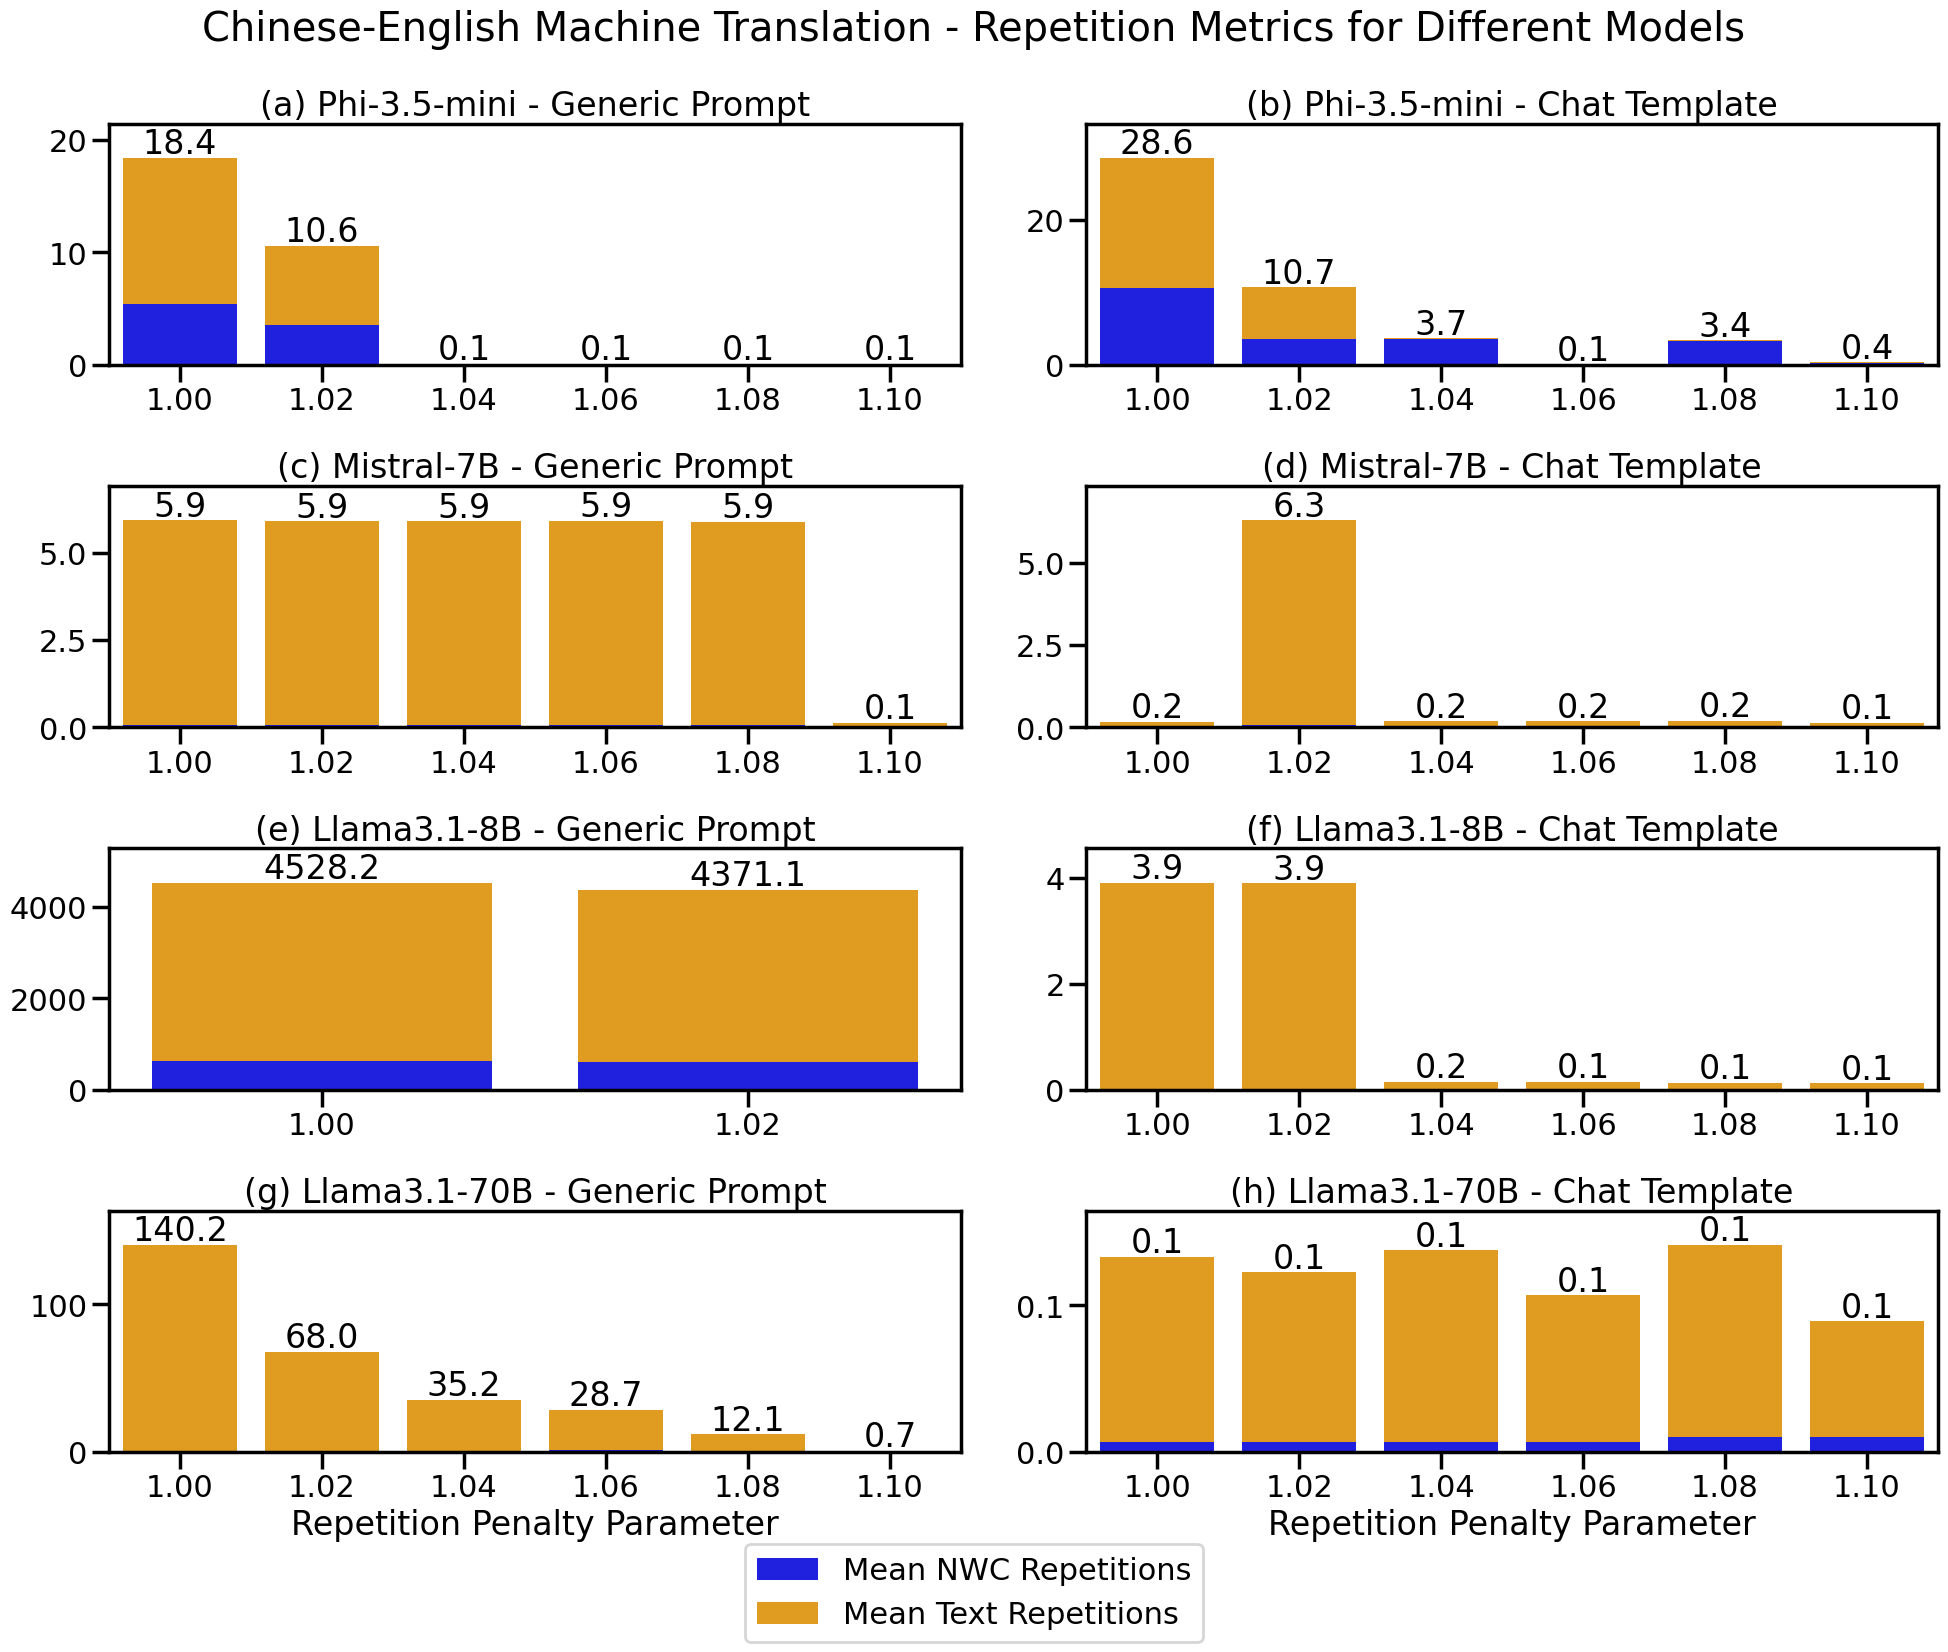

In [15]:
plot_detailed_repetitions(results, model_names)

In [16]:
# plot the results
import matplotlib.pyplot as plt
import seaborn as sns


def plot_rpp_tuning(
    results, model_name=None, title=True, repetition_metric="total_repetitions"
):
    # make the font size bigger
    sns.set_context("poster")

    markers = ["D", "o", "s", "x", "P", "v", "X", "p", "*", "h"]
    colors = [
        "blue",
        "orange",
        "green",
        "red",
        "purple",
        "brown",
        "pink",
        "gray",
        "olive",
        "cyan",
    ]
    bar_colors = ["blue", "orange"]

    if model_name:
        models = [model_name]
    else:
        models = model_names

    fig, ax = plt.subplots(len(models), 2, figsize=(20, 5 * len(models)))
    # print(f"ax: {ax.shape}")
    columns = ["comet", "rap"]


    for row, model_name in enumerate(model_names):
        print(f"Model: {model_name}")
        for col, model_name_ext in enumerate(model_name_exts):
            print(f"model_name_ext: {model_name_ext}")
            df = results[model_name_ext]
            df = df[df["model"] == model_name]

            best_perf_indices = []
            for i, column in enumerate(columns):
                # print(f"i: {i}, model_name_ext: {model_name_ext}, column: {column}")
                sns.lineplot(
                    x="rpp",
                    y=column,
                    data=df,
                    ax=ax[row][col],
                    label=find_display_name(column),
                    marker=markers[i],
                    color=colors[i],
                    legend=False,
                )

                best_perf_index = df[column].idxmax()
                best_perf_indices.append(best_perf_index)
                ax[row][col].axvspan(
                    df["rpp"][best_perf_index] - 0.005,
                    df["rpp"][best_perf_index] + 0.005,
                    alpha=0.5,
                    edgecolor="none",
                    facecolor=bar_colors[i],
                )

            twin = ax[row][col].twinx()
            repetition_metric_title = find_display_name(
                repetition_metric
            )
            sns.lineplot(
                x="rpp",
                y=repetition_metric,
                data=df,
                ax=twin,
                label=repetition_metric_title,
                marker=markers[2],
                color=colors[2],
                legend=False,
            )

            twin.set_ylabel(repetition_metric_title)

            # add values on lineplot
            for i, p in enumerate(ax[row][col].lines):
                best_perf_index = best_perf_indices[i]
                for j, column in enumerate(columns):
                    for rpp in p.get_xdata():
                        if rpp == df["rpp"][best_perf_index]:
                            val = df["comet"][best_perf_index]
                            ax[row][col].annotate(
                                f"{val:.3f}",
                                (rpp, val),
                                ha="center",
                                va="center",
                                xytext=(0, 15),
                                textcoords="offset points",
                                color=colors[0],
                            )
                            val = df["rap"][best_perf_index]
                            ax[row][col].annotate(
                                f"{val:.3f}",
                                (rpp, val),
                                ha="center",
                                va="center",
                                xytext=(0, -20),
                                textcoords="offset points",
                                color=colors[1],
                            )

            for _, p in enumerate(twin.lines):
                for i, column in enumerate(columns):
                    best_perf_index = best_perf_indices[i]
                    for rpp in p.get_xdata():
                        if rpp == df["rpp"][best_perf_index]:
                            val = df[repetition_metric][best_perf_index]
                            twin.annotate(
                                f"{val:.3f}" if repetition_metric != "total_repetitions" else f"{val:.1f}",
                                (rpp, val),
                                ha="center",
                                va="center",
                                xytext=(0, 15),
                                textcoords="offset points",
                                color=colors[2],
                            )

            # increase y-axis limits
            y_limits = ax[row][col].get_ylim()
            ax[row][col].set_ylim([y_limits[0] - (y_limits[1] - y_limits[0]) * 0.1, y_limits[1] + (y_limits[1] - y_limits[0]) * 0.1])

            xlabel = "Repetition Penalty Parameter" if row == len(models) - 1 else None
            ax[row][col].set_xlabel(xlabel)

            ylabel = find_display_name(column, rap_only=False)
            ax[row][col].set_ylabel(ylabel)

            ax[row][col].set_title(
                f"({chr(97 + row * 2 + col)}) {model_name} - {model_name_ext}"
            )

    if title:
        fig.suptitle(f"Model - {shorter(model_name)}")

    handles, labels = ax[row][col].get_legend_handles_labels()
    handles2, labels2 = twin.get_legend_handles_labels()
    labels[0] = "COMET"
    labels[1] = "RAP-COMET"
    fig.legend(
        handles + handles2,
        labels + labels2,
        bbox_to_anchor=(0.5, -0.05),
        loc="lower center",
    )

    # make the plot look nice
    plt.tight_layout()
    plt.show()

Model: Phi-3.5-mini
model_name_ext: Generic Prompt
model_name_ext: Chat Template
Model: Mistral-7B
model_name_ext: Generic Prompt
model_name_ext: Chat Template
Model: Llama3.1-8B
model_name_ext: Generic Prompt
model_name_ext: Chat Template
Model: Llama3.1-70B
model_name_ext: Generic Prompt
model_name_ext: Chat Template


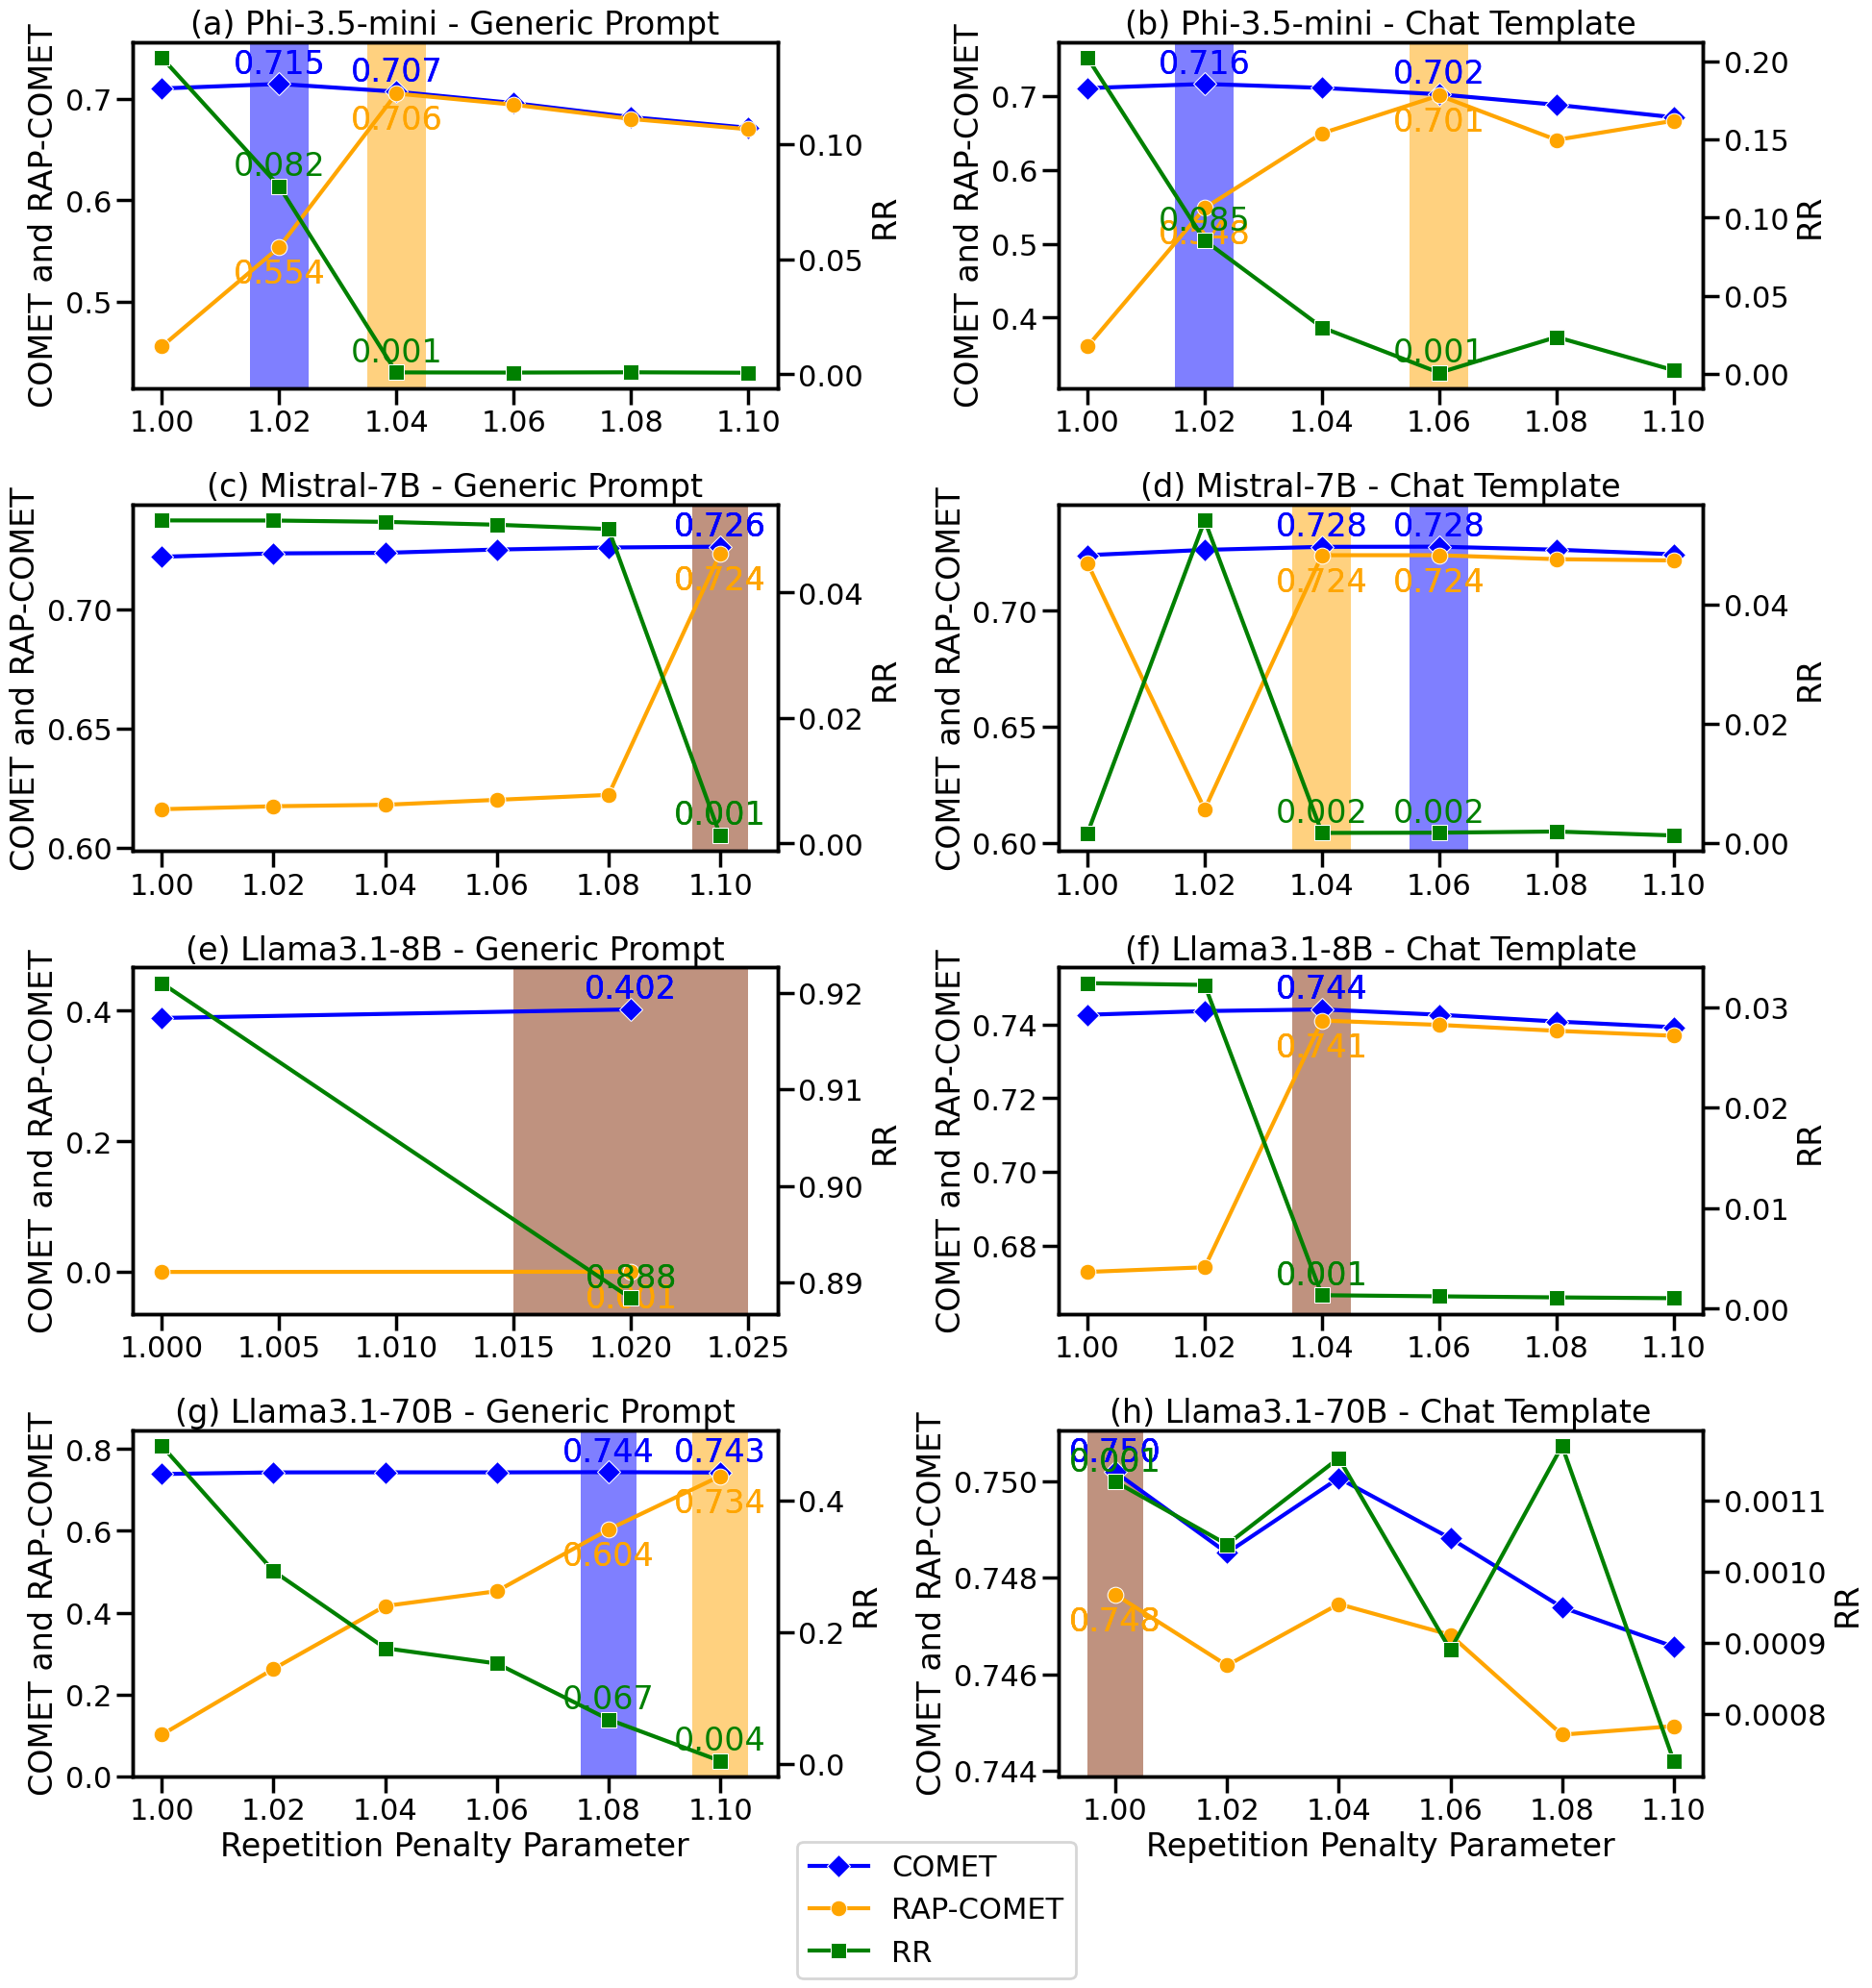

In [17]:
plot_rpp_tuning(
    results, title=False, repetition_metric="rr"
)

Model: Phi-3.5-mini
model_name_ext: Generic Prompt
model_name_ext: Chat Template
Model: Mistral-7B
model_name_ext: Generic Prompt
model_name_ext: Chat Template
Model: Llama3.1-8B
model_name_ext: Generic Prompt
model_name_ext: Chat Template
Model: Llama3.1-70B
model_name_ext: Generic Prompt
model_name_ext: Chat Template


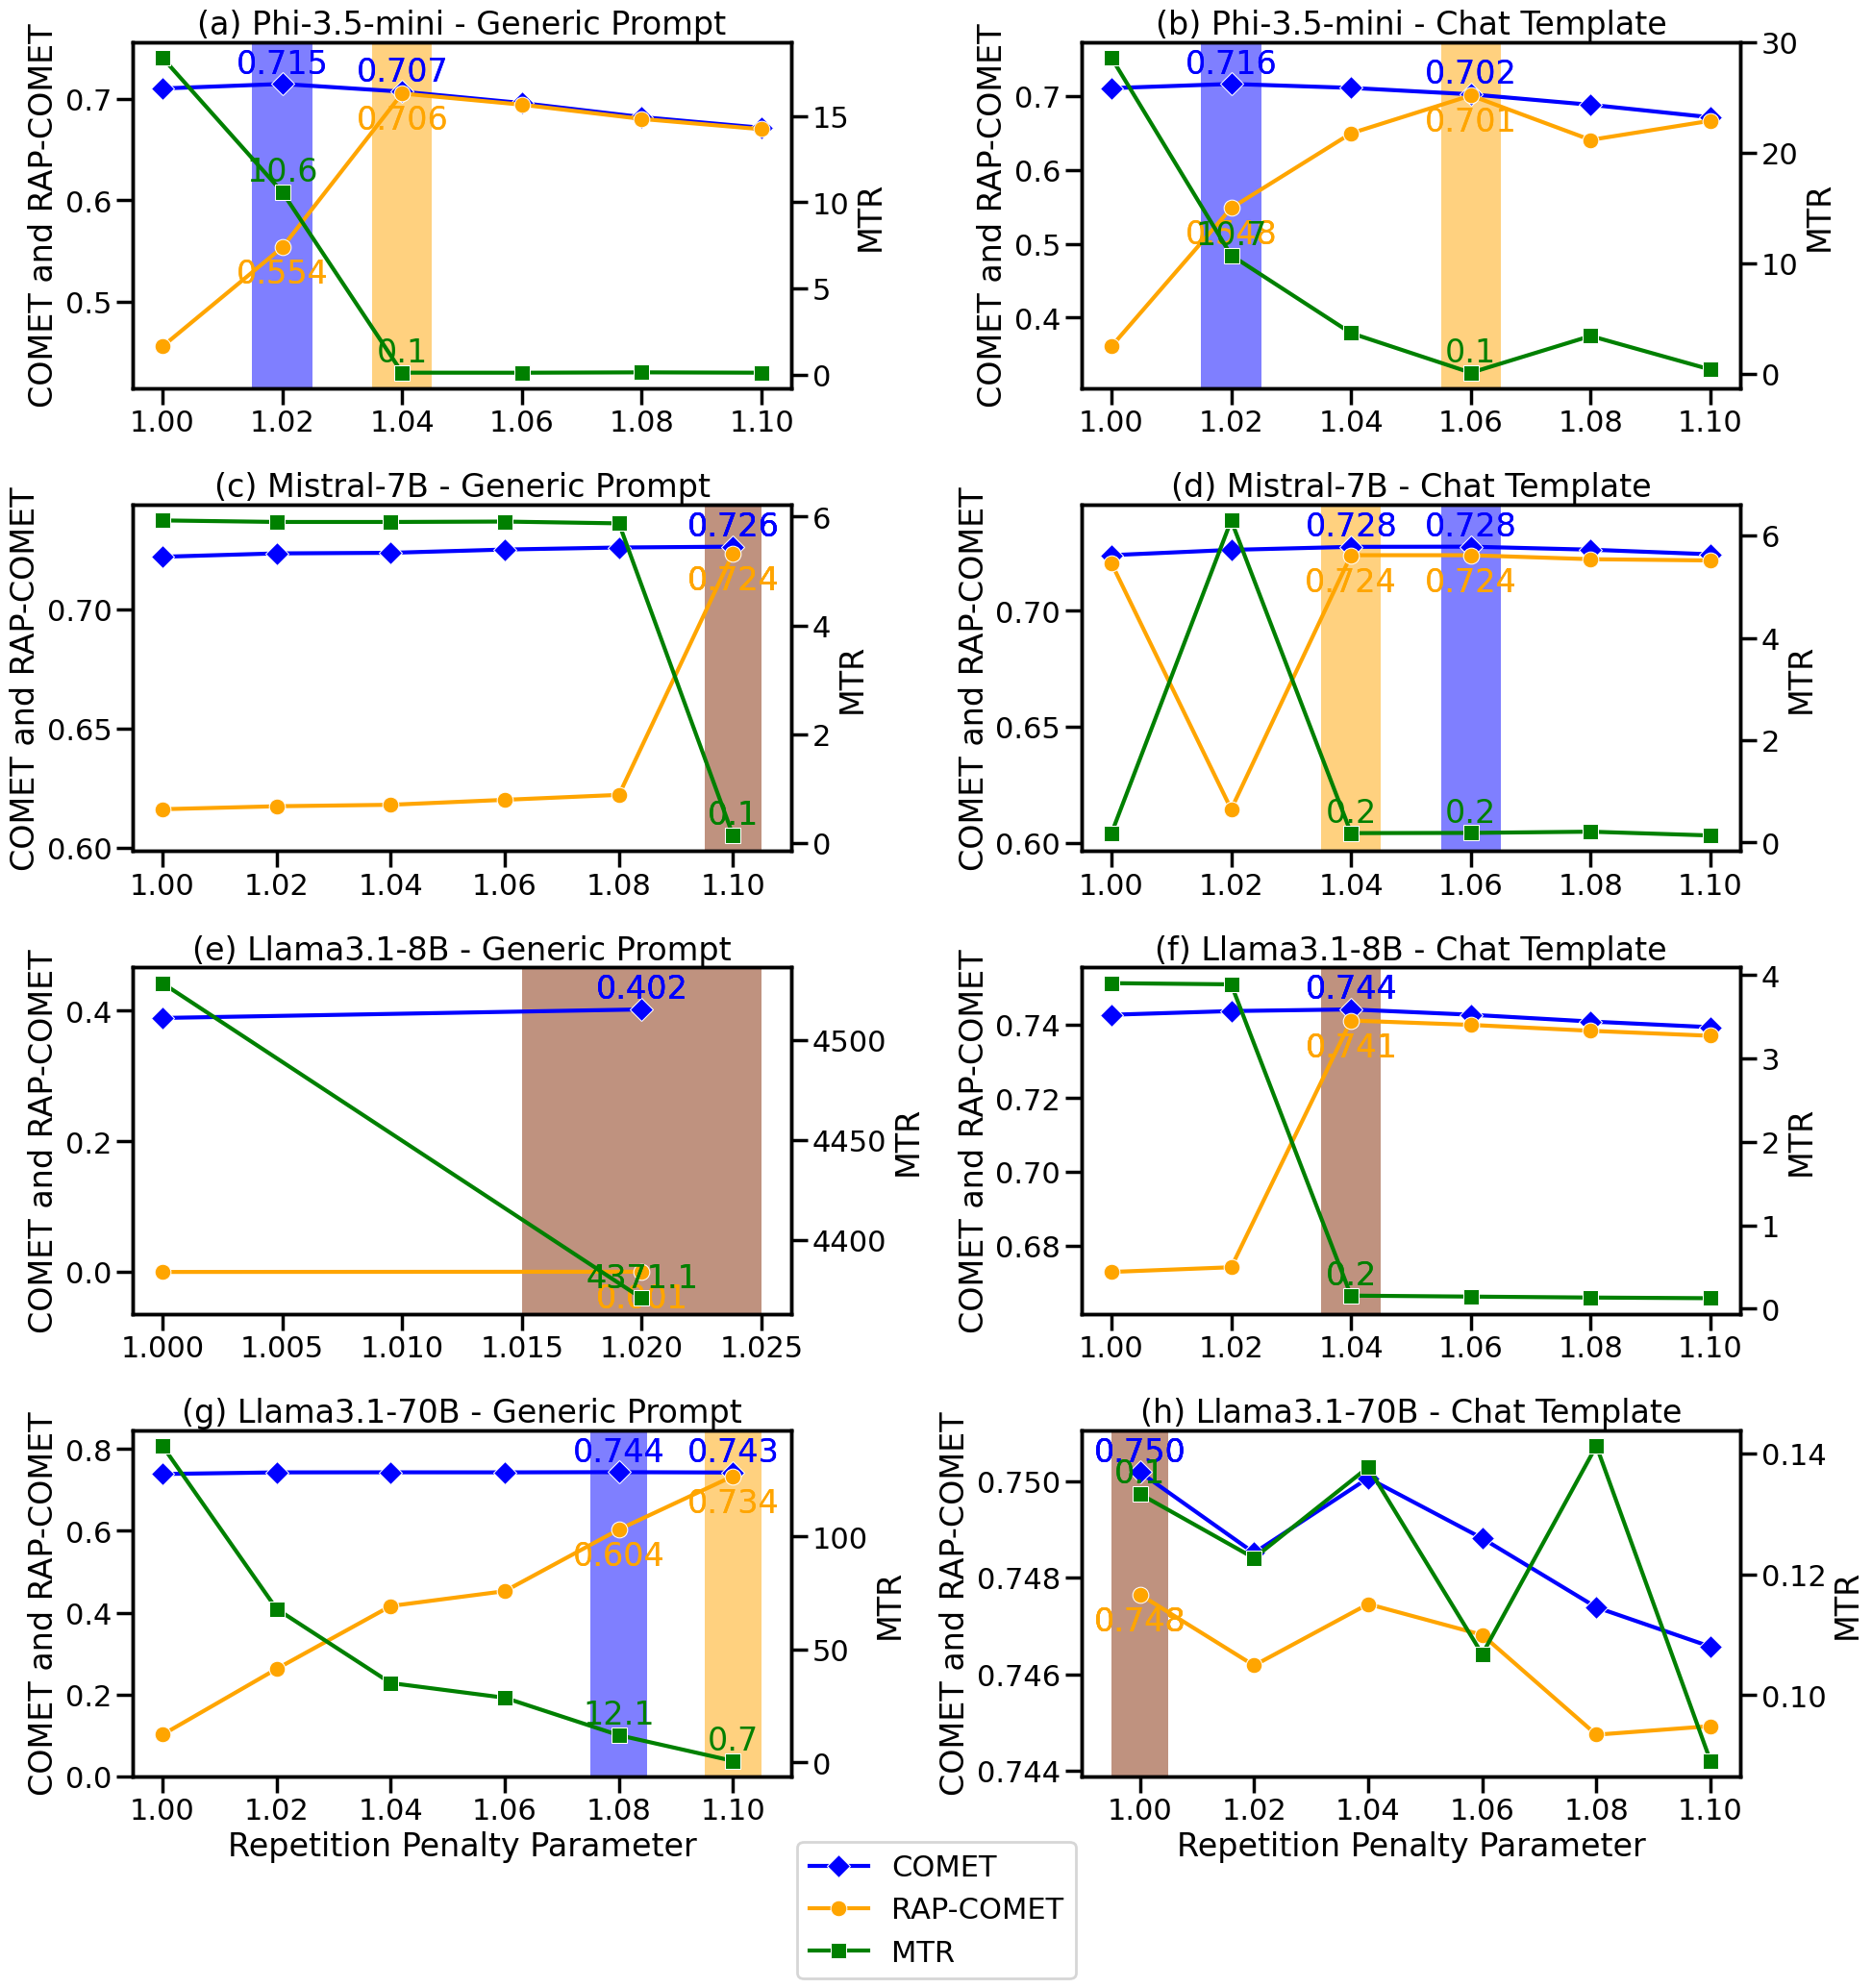

In [18]:
plot_rpp_tuning(
    results, title=False, repetition_metric="total_repetitions"
)

In [19]:
model_names = ['Phi-3.5-mini', 'Mistral-7B', 'Llama3.1-70B']

In [59]:
# plot the results
import matplotlib.pyplot as plt
import seaborn as sns


def plot_rpp_tuning_v2(
    results, model_names, title=True, repetition_metric="total_repetitions"
):
    # make the font size bigger
    sns.set_context("poster")

    markers = ["D", "o", "s", "x", "P", "v", "X", "p", "*", "h"]
    colors = [
        "blue",
        "orange",
        "green",
        "red",
        "purple",
        "brown",
        "pink",
        "gray",
        "olive",
        "cyan",
    ]
    bar_colors = ["blue", "orange"]

    fig, ax = plt.subplots(2, 3, figsize=(30, 10))
    # print(f"ax: {ax.shape}")
    columns = ["comet", "rap"]


    for row, model_name_ext in enumerate(model_name_exts):
        print(f"model_name_ext: {model_name_ext}")
        for col, model_name in enumerate(model_names):
            print(f"Model: {model_name}")
            df = results[model_name_ext]
            df = df[df["model"] == model_name]

            best_perf_indices = []
            for i, column in enumerate(columns):
                # print(f"i: {i}, model_name_ext: {model_name_ext}, column: {column}")
                sns.lineplot(
                    x="rpp",
                    y=column,
                    data=df,
                    ax=ax[row][col],
                    label=find_display_name(column),
                    marker=markers[i],
                    color=colors[i],
                    legend=False,
                )

                best_perf_index = df[column].idxmax()
                best_perf_indices.append(best_perf_index)
                ax[row][col].axvspan(
                    df["rpp"][best_perf_index] - 0.005,
                    df["rpp"][best_perf_index] + 0.005,
                    alpha=0.5,
                    edgecolor="none",
                    facecolor=bar_colors[i],
                )

            twin = ax[row][col].twinx()
            repetition_metric_title = find_display_name(
                repetition_metric
            )
            sns.lineplot(
                x="rpp",
                y=repetition_metric,
                data=df,
                ax=twin,
                label=repetition_metric_title,
                marker=markers[2],
                color=colors[2],
                legend=False,
            )

            twin.set_ylabel(repetition_metric_title)

            # add values on lineplot
            for i, p in enumerate(ax[row][col].lines):
                best_perf_index = best_perf_indices[i]
                for j, column in enumerate(columns):
                    for rpp in p.get_xdata():
                        if rpp == df["rpp"][best_perf_index]:
                            val = df["comet"][best_perf_index]
                            ax[row][col].annotate(
                                f"{val:.3f}",
                                (rpp, val),
                                ha="center",
                                va="center",
                                xytext=(0, 15),
                                textcoords="offset points",
                                color=colors[0],
                            )
                            val = df["rap"][best_perf_index]
                            ax[row][col].annotate(
                                f"{val:.3f}",
                                (rpp, val),
                                ha="center",
                                va="center",
                                xytext=(0, -20),
                                textcoords="offset points",
                                color=colors[1],
                            )

            for _, p in enumerate(twin.lines):
                for i, column in enumerate(columns):
                    best_perf_index = best_perf_indices[i]
                    for rpp in p.get_xdata():
                        if rpp == df["rpp"][best_perf_index]:
                            val = df[repetition_metric][best_perf_index]
                            twin.annotate(
                                f"{val:.3f}" if repetition_metric != "total_repetitions" else f"{val:.1f}",
                                (rpp, val),
                                ha="center",
                                va="center",
                                xytext=(0, 15),
                                textcoords="offset points",
                                color=colors[2],
                            )

            # increase y-axis limits
            y_limits = ax[row][col].get_ylim()
            if row == 1 and col == 2:
                ax[row][col].set_ylim([0.74, 0.755])
            else:
                ax[row][col].set_ylim([y_limits[0] - (y_limits[1] - y_limits[0]) * 0.1, y_limits[1] + (y_limits[1] - y_limits[0]) * 0.1])

            y_limits = twin.get_ylim()
            if row == 1 and col == 0:
                twin.set_ylim([y_limits[0], 39])

            xlabel = "Repetition Penalty Parameter" if row == 1 else None
            ax[row][col].set_xlabel(xlabel)

            ylabel = find_display_name(column, rap_only=False)
            ax[row][col].set_ylabel(ylabel)

            ax[row][col].set_title(
                f"({chr(97 + row * 2 + col)}) {model_name} - {model_name_ext}"
            )

    if title:
        fig.suptitle(f"Model - {shorter(model_name)}")

    handles, labels = ax[row][col].get_legend_handles_labels()
    handles2, labels2 = twin.get_legend_handles_labels()
    labels[0] = "COMET"
    labels[1] = "RAP-COMET"
    fig.legend(
        handles + handles2,
        labels + labels2,
        bbox_to_anchor=(0.5, -0.13),
        loc="lower center",
    )

    # make the plot look nice
    plt.tight_layout()
    plt.show()

model_name_ext: Generic Prompt
Model: Phi-3.5-mini
Model: Mistral-7B
Model: Llama3.1-70B
model_name_ext: Chat Template
Model: Phi-3.5-mini
Model: Mistral-7B
Model: Llama3.1-70B


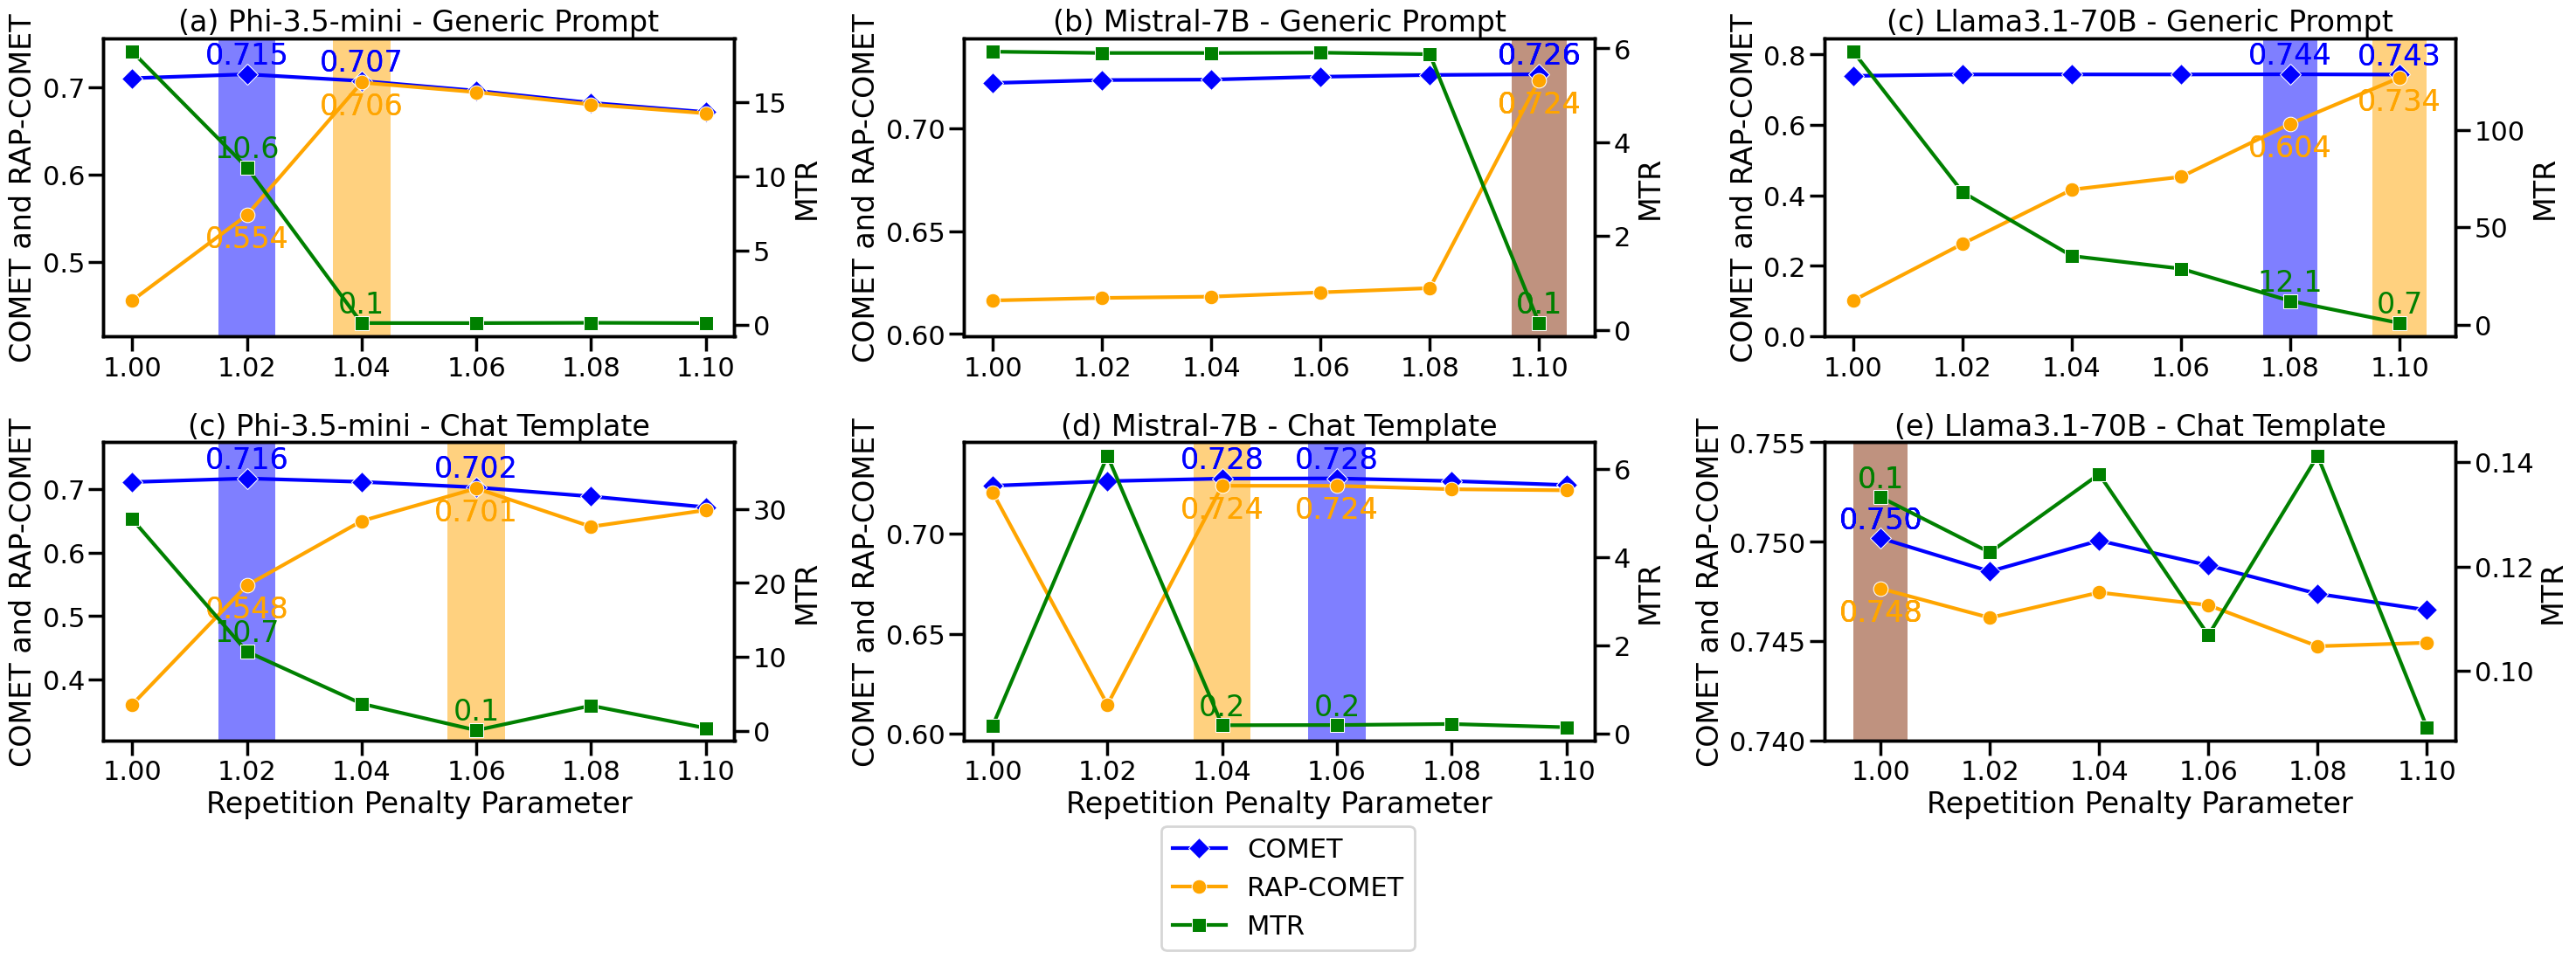

In [64]:
model_names = ['Phi-3.5-mini', 'Mistral-7B', 'Llama3.1-70B']
plot_rpp_tuning_v2(results, model_names, title=False, repetition_metric="total_repetitions")

model_name_ext: Generic Prompt
Model: Phi-3.5-mini
Model: Internlm2_5-7B
Model: Llama3.1-70B
model_name_ext: Chat Template
Model: Phi-3.5-mini
Model: Internlm2_5-7B
Model: Llama3.1-70B


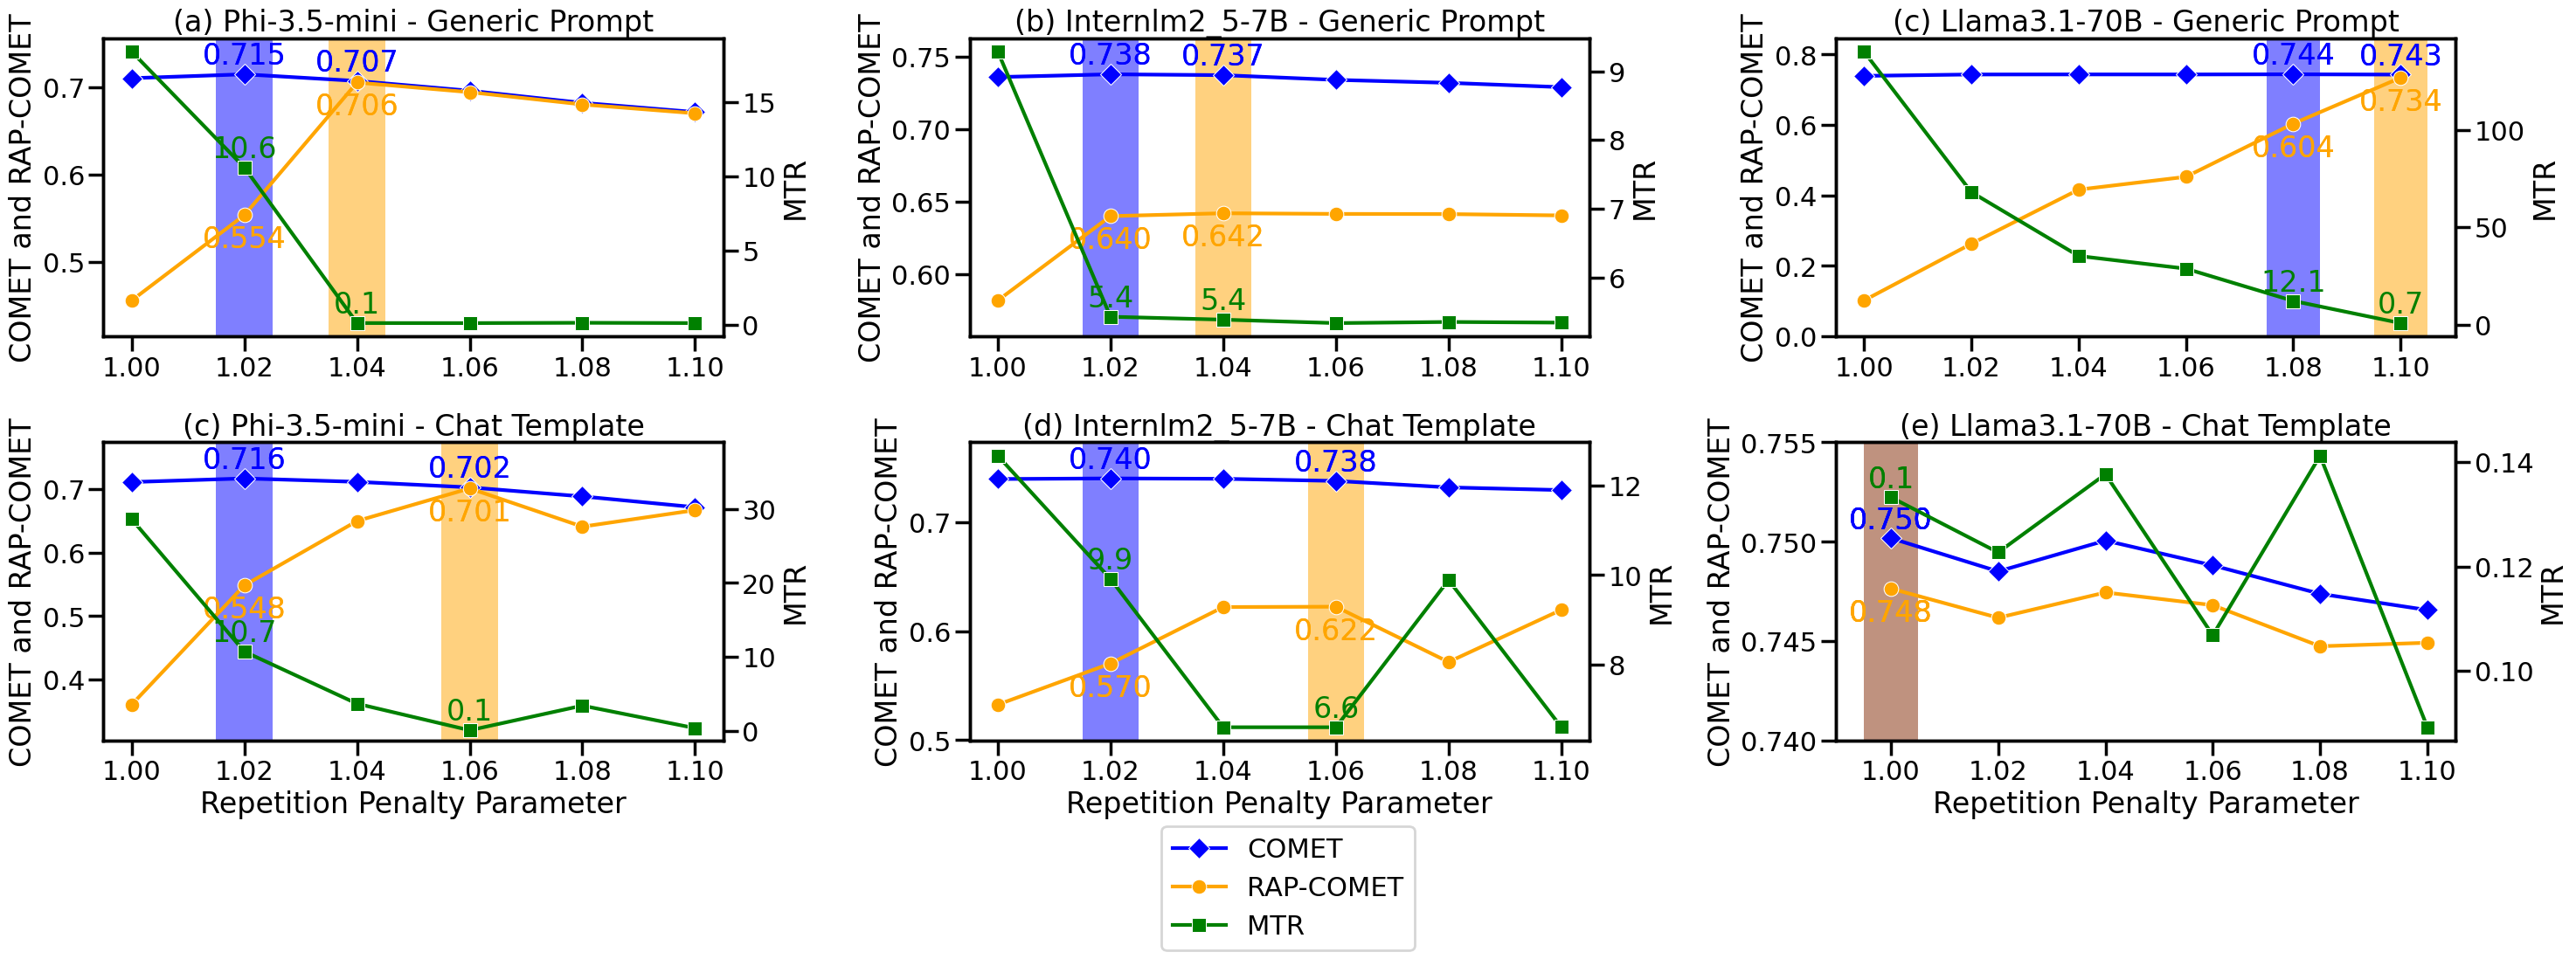

In [65]:
model_names = ['Phi-3.5-mini', 'Internlm2_5-7B', 'Llama3.1-70B']
plot_rpp_tuning_v2(results, model_names, title=False, repetition_metric="total_repetitions")